In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression

In [3]:
df=pd.read_csv("/kaggle/input/water-quality-monitoring-dataset/brisbane_water_quality.csv")

In [4]:
imputer_df=SimpleImputer(strategy="constant",fill_value=np.nan)
new_data=imputer_df.fit_transform(df)
# new_d1=get_feature_names_out(new_data)
new_df=pd.DataFrame(new_data,columns=df.columns)
new_df.sample()

,Timestamp,Record number,Average Water Speed,Average Water Direction,Chlorophyll,Chlorophyll [quality],Temperature,Temperature [quality],Dissolved Oxygen,Dissolved Oxygen [quality],Dissolved Oxygen (%Saturation),Dissolved Oxygen (%Saturation) [quality],pH,pH [quality],Salinity,Salinity [quality],Specific Conductance,Specific Conductance [quality],Turbidity,Turbidity [quality]
21006,2024-03-17 06:30:00,22474,45.223,36.071,1.161,1020.0,24.204,1020.0,6.282,1020.0,88.1,1020.0,8.068,1020.0,28.376,1020.0,43.976,1020.0,2.73,1020.0


In [5]:
# get_feature_names_out(input_features=new_data)


In [6]:
new_df.sample(10)

,Timestamp,Record number,Average Water Speed,Average Water Direction,Chlorophyll,Chlorophyll [quality],Temperature,Temperature [quality],Dissolved Oxygen,Dissolved Oxygen [quality],Dissolved Oxygen (%Saturation),Dissolved Oxygen (%Saturation) [quality],pH,pH [quality],Salinity,Salinity [quality],Specific Conductance,Specific Conductance [quality],Turbidity,Turbidity [quality]
30117,2024-06-22 00:30:00,31585,27.101,161.259,1.07,1020.0,17.854,1020.0,6.35,1020.0,79.845,1020.0,8.152,1020.0,29.562,1020.0,45.544,1020.0,2.369,1020.0
581,2023-08-16 22:00:00,2049,2.048,204.263,3.671,1020.0,21.472,1020.0,7.327,1020.0,101.938,1020.0,8.129,1020.0,35.353,1020.0,53.461,1020.0,2.82,1020.0
2461,2023-09-24 08:30:00,3929,2.177,324.228,2.633,1020.0,19.434,1020.0,7.083,1020.0,95.207,1020.0,8.067,1020.0,35.783,1020.0,54.025,1020.0,3.267,1020.0
26339,2024-05-26 23:00:00,27807,9.499,64.282,1.881,1020.0,21.104,1020.0,5.96,1020.0,79.447,1020.0,8.071,1020.0,29.144,1020.0,44.98,1020.0,8.946,1020.0
13612,2024-01-26 06:40:00,15080,25.993,91.204,2.884,1020.0,NaN,NaN,NaN,NaN,NaN,NaN,7.922,1020.0,31.137,1020.0,47.921,1020.0,3.17,1020.0
26306,2024-05-26 17:30:00,27774,10.699,82.307,2.818,1020.0,21.271,1020.0,6.852,1020.0,91.259,1020.0,8.09,1020.0,28.483,1020.0,44.064,1020.0,3.704,1020.0
9189,2023-12-26 18:30:00,10657,1.941,116.179,5.281,1020.0,NaN,NaN,6.832,1020.0,105.942,1020.0,8.002,1020.0,33.729,1020.0,51.47,1020.0,5.058,1020.0
7301,2023-12-13 18:00:00,8769,8.0,335.0,1.361,1020.0,NaN,NaN,7.344,1020.0,NaN,NaN,8.05,1020.0,NaN,NaN,54.822,1020.0,1.55,1020.0
22618,2024-03-28 09:20:00,24086,18.454,53.17,4.418,1020.0,24.264,1020.0,7.272,1020.0,98.483,1020.0,7.987,1020.0,22.081,1020.0,35.079,1020.0,5.259,1020.0
21644,2024-03-21 16:00:00,23112,6.031,295.378,2.588,1020.0,25.291,1020.0,7.183,1020.0,99.573,1020.0,8.086,1020.0,23.024,1020.0,36.458,1020.0,7.54,1020.0


In [7]:
sd=new_df.drop(columns=["Timestamp"])

In [8]:
sd1=sd.astype(float)
# new_df.dtypes

In [9]:
sd1.dtypes

Record number                               float64
Average Water Speed                         float64
Average Water Direction                     float64
Chlorophyll                                 float64
Chlorophyll [quality]                       float64
Temperature                                 float64
Temperature [quality]                       float64
Dissolved Oxygen                            float64
Dissolved Oxygen [quality]                  float64
Dissolved Oxygen (%Saturation)              float64
Dissolved Oxygen (%Saturation) [quality]    float64
pH                                          float64
pH [quality]                                float64
Salinity                                    float64
Salinity [quality]                          float64
Specific Conductance                        float64
Specific Conductance [quality]              float64
Turbidity                                   float64
Turbidity [quality]                         float64
dtype: objec

In [10]:
sd1.isnull().sum()

Record number                                  0
Average Water Speed                           20
Average Water Direction                        1
Chlorophyll                                  585
Chlorophyll [quality]                        808
Temperature                                 5164
Temperature [quality]                       5344
Dissolved Oxygen                            4300
Dissolved Oxygen [quality]                  4524
Dissolved Oxygen (%Saturation)              5749
Dissolved Oxygen (%Saturation) [quality]    5950
pH                                          1084
pH [quality]                                1308
Salinity                                    3958
Salinity [quality]                          4182
Specific Conductance                        1367
Specific Conductance [quality]              1591
Turbidity                                   2000
Turbidity [quality]                         2224
dtype: int64

In [11]:
# new_df.nunique()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


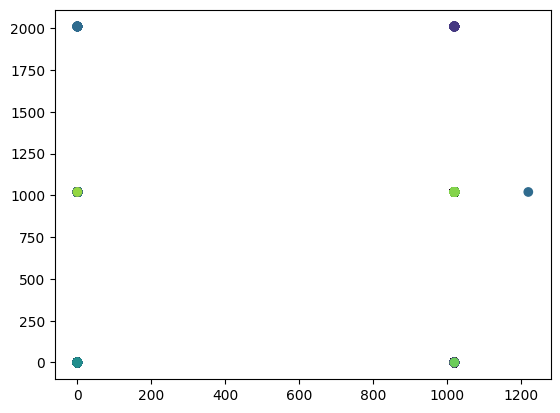

In [12]:
nw_sd1=sd1.fillna(0)
clust_df=KMeans(n_clusters=50,random_state=42)
sd1["cluster"]=clust_df.fit_predict(nw_sd1)
plt.scatter(nw_sd1["Chlorophyll [quality]"],nw_sd1["Dissolved Oxygen (%Saturation) [quality]"],c=sd1['cluster'], cmap='viridis')
plt.show()

In [13]:
corr_df=sd1.corr()
corr_df

,Record number,Average Water Speed,Average Water Direction,Chlorophyll,Chlorophyll [quality],Temperature,Temperature [quality],Dissolved Oxygen,Dissolved Oxygen [quality],Dissolved Oxygen (%Saturation),Dissolved Oxygen (%Saturation) [quality],pH,pH [quality],Salinity,Salinity [quality],Specific Conductance,Specific Conductance [quality],Turbidity,Turbidity [quality],cluster
Record number,1.000000,0.223816,0.035966,-0.036576,-0.010003,-0.205499,-0.072232,0.015754,-0.039948,-0.379850,-0.104327,0.563030,NaN,-0.674773,NaN,-0.656478,NaN,0.303937,NaN,-0.055266
Average Water Speed,0.223816,1.000000,0.027434,-0.049266,-0.003856,0.010109,-0.039419,-0.061806,-0.020588,-0.150402,-0.052517,0.048922,NaN,-0.117905,NaN,-0.120891,NaN,0.106090,NaN,0.086000
Average Water Direction,0.035966,0.027434,1.000000,-0.006128,-0.003393,-0.043847,-0.002093,-0.005024,-0.001526,-0.058006,0.006037,0.025113,NaN,-0.006981,NaN,-0.010274,NaN,0.014456,NaN,0.025275
Chlorophyll,-0.036576,-0.049266,-0.006128,1.000000,-0.003513,0.219520,0.012439,0.230260,-0.001233,0.368053,-0.000938,-0.027420,NaN,-0.275072,NaN,-0.285820,NaN,0.087728,NaN,0.074478
Chlorophyll [quality],-0.010003,-0.003856,-0.003393,-0.003513,1.000000,-0.009360,1.000000,0.010733,NaN,0.006471,-0.000295,0.007015,NaN,0.006808,NaN,0.005517,NaN,-0.002737,NaN,-0.002589
Temperature,-0.205499,0.010109,-0.043847,0.219520,-0.009360,1.000000,-0.064299,-0.379986,-0.028846,0.265414,-0.076350,-0.579413,NaN,-0.062251,NaN,-0.037266,NaN,-0.111493,NaN,-0.056998
Temperature [quality],-0.072232,-0.039419,-0.002093,0.012439,1.000000,-0.064299,1.000000,0.054469,NaN,0.023692,0.540437,0.045804,NaN,0.050701,NaN,0.040618,NaN,-0.022436,NaN,-0.016932
Dissolved Oxygen,0.015754,-0.061806,-0.005024,0.230260,0.010733,-0.379986,0.054469,1.000000,-0.035736,0.661893,-0.008245,0.403153,NaN,-0.151339,NaN,-0.167326,NaN,0.048110,NaN,0.119398
Dissolved Oxygen [quality],-0.039948,-0.020588,-0.001526,-0.001233,NaN,-0.028846,NaN,-0.035736,1.000000,-0.051175,0.418562,0.022510,NaN,0.030739,NaN,0.025479,NaN,-0.012105,NaN,-0.022439
Dissolved Oxygen (%Saturation),-0.379850,-0.150402,-0.058006,0.368053,0.006471,0.265414,0.023692,0.661893,-0.051175,1.000000,-0.044286,-0.098004,NaN,0.056577,NaN,0.072246,NaN,-0.077124,NaN,0.090711


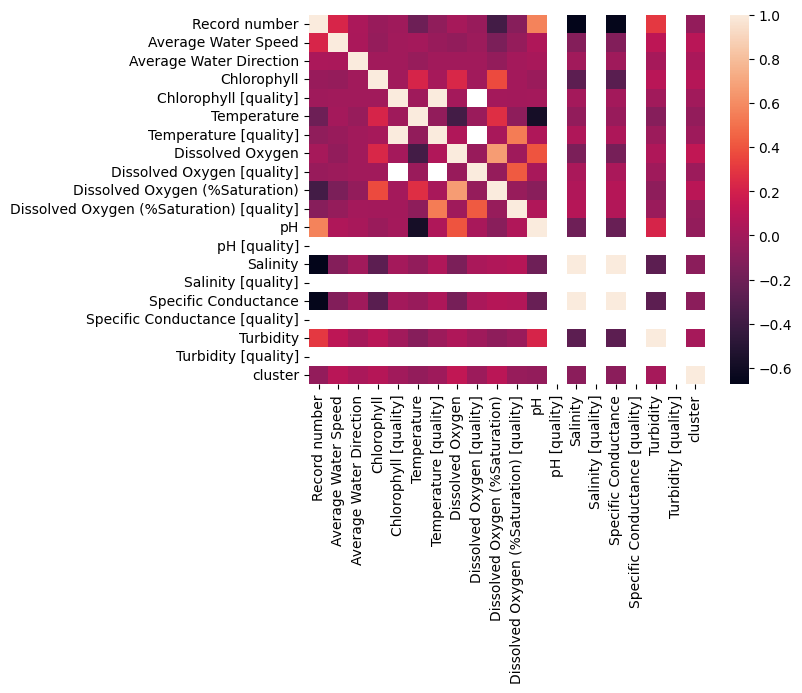

In [14]:
sns.heatmap(corr_df)
plt.show()

In [15]:
# sns.clustermap(corr_df)
# plt.show()

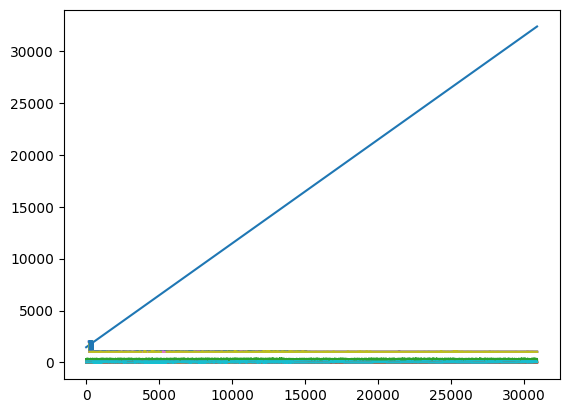

In [16]:
plt.plot(sd1)
plt.show()

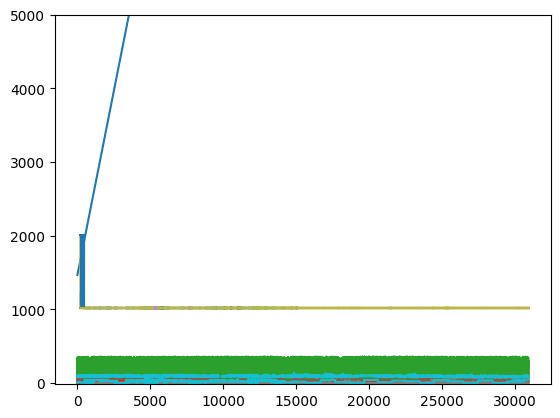

In [17]:
plt.plot(sd1)
plt.ylim(-15,5000)
plt.show()

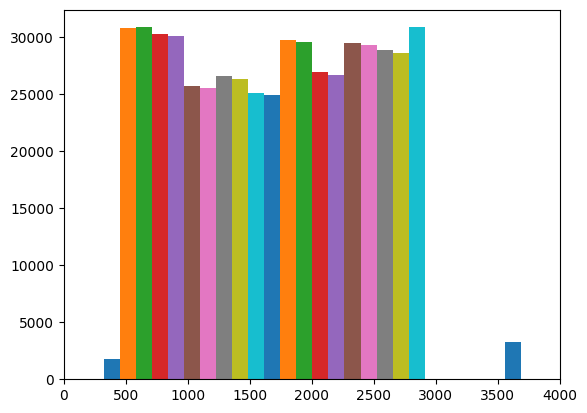

In [18]:
plt.hist(sd1)
plt.xlim(0,4000)
plt.show()

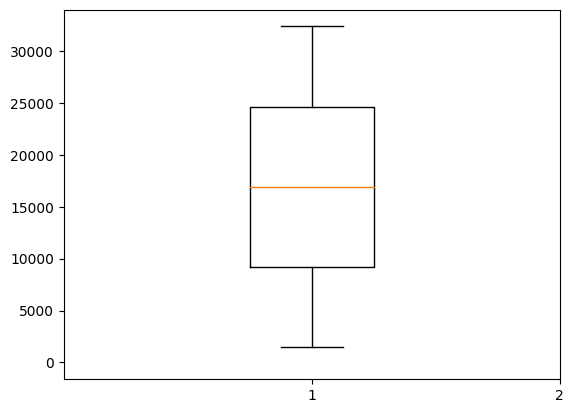

In [19]:
plt.boxplot(sd1)
plt.xlim(0,2)
plt.show()

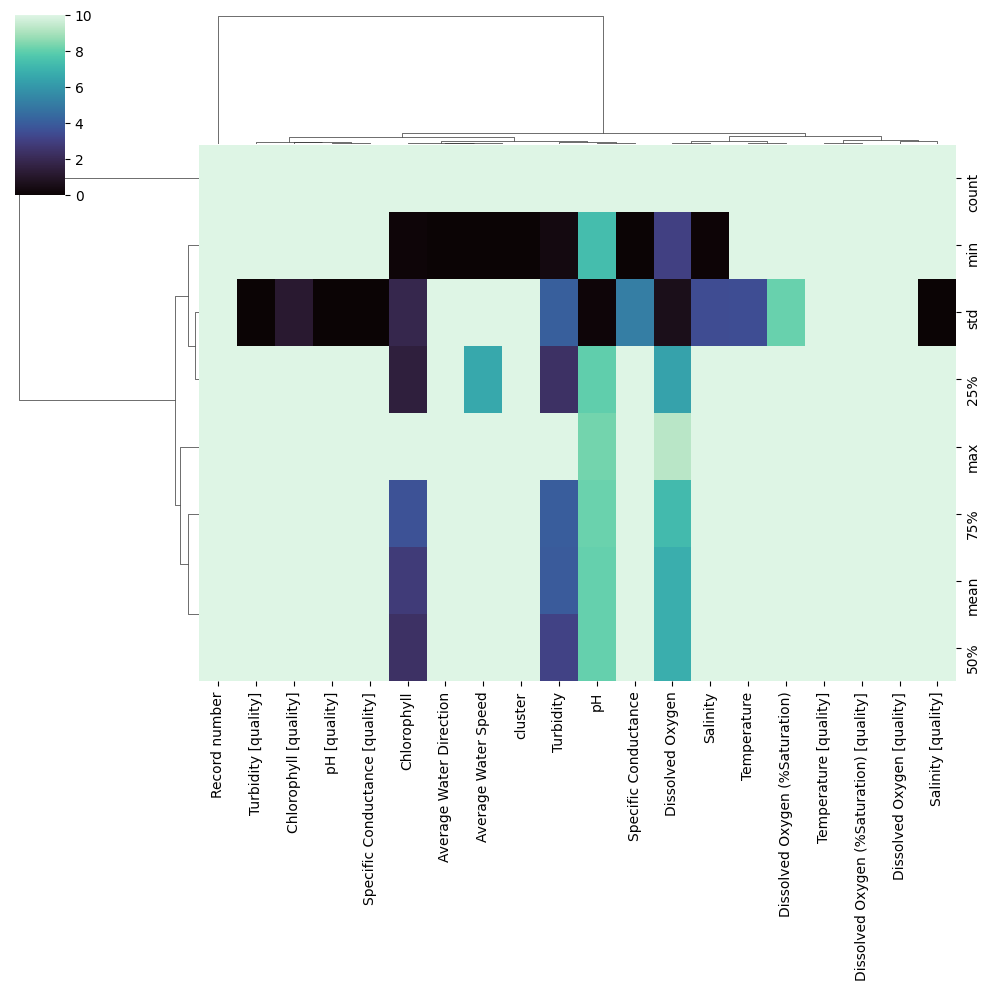

In [20]:
des_sd=sd1.describe()
sns.clustermap(des_sd,cmap="mako", vmin=0, vmax=10)
plt.show()

In [21]:
nw_sd1

,Record number,Average Water Speed,Average Water Direction,Chlorophyll,Chlorophyll [quality],Temperature,Temperature [quality],Dissolved Oxygen,Dissolved Oxygen [quality],Dissolved Oxygen (%Saturation),Dissolved Oxygen (%Saturation) [quality],pH,pH [quality],Salinity,Salinity [quality],Specific Conductance,Specific Conductance [quality],Turbidity,Turbidity [quality]
0,1468.0,4.834,73.484,1.621,0.0,20.018,0.0,7.472,0.0,101.175,0.0,8.176,0.0,35.215,0.0,53.262,0.0,2.068,0.0
1,1469.0,2.544,106.424,1.959,0.0,19.986,0.0,7.455,0.0,100.884,0.0,8.175,0.0,35.209,0.0,53.254,0.0,1.994,0.0
2,1470.0,1.260,156.755,1.620,0.0,20.001,0.0,7.430,0.0,100.571,0.0,8.171,0.0,35.207,0.0,53.252,0.0,2.030,0.0
3,1471.0,0.760,281.754,1.761,0.0,19.983,0.0,7.419,0.0,100.398,0.0,8.171,0.0,35.211,0.0,53.257,0.0,1.973,0.0
4,1472.0,3.397,244.637,1.635,0.0,19.986,0.0,7.429,0.0,100.538,0.0,8.171,0.0,35.208,0.0,53.253,0.0,1.944,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30889,32357.0,13.314,82.720,0.944,1020.0,18.607,1020.0,6.876,1020.0,87.556,1020.0,8.151,1020.0,29.268,1020.0,45.134,1020.0,3.963,1020.0
30890,32358.0,32.617,18.081,1.161,1020.0,18.551,1020.0,6.918,1020.0,87.987,1020.0,8.163,1020.0,29.254,1020.0,45.115,1020.0,3.928,1020.0
30891,32359.0,8.552,306.184,1.192,1020.0,18.558,1020.0,6.651,1020.0,84.606,1020.0,8.145,1020.0,29.250,1020.0,45.110,1020.0,4.097,1020.0
30892,32360.0,10.341,24.711,1.031,1020.0,18.547,1020.0,6.740,1020.0,85.713,1020.0,8.154,1020.0,29.247,1020.0,45.105,1020.0,4.962,1020.0


In [23]:
X=nw_sd1.drop(columns=["Turbidity [quality]"])
Y=nw_sd1[["Turbidity [quality]"]]
X

,Record number,Average Water Speed,Average Water Direction,Chlorophyll,Chlorophyll [quality],Temperature,Temperature [quality],Dissolved Oxygen,Dissolved Oxygen [quality],Dissolved Oxygen (%Saturation),Dissolved Oxygen (%Saturation) [quality],pH,pH [quality],Salinity,Salinity [quality],Specific Conductance,Specific Conductance [quality],Turbidity
0,1468.0,4.834,73.484,1.621,0.0,20.018,0.0,7.472,0.0,101.175,0.0,8.176,0.0,35.215,0.0,53.262,0.0,2.068
1,1469.0,2.544,106.424,1.959,0.0,19.986,0.0,7.455,0.0,100.884,0.0,8.175,0.0,35.209,0.0,53.254,0.0,1.994
2,1470.0,1.260,156.755,1.620,0.0,20.001,0.0,7.430,0.0,100.571,0.0,8.171,0.0,35.207,0.0,53.252,0.0,2.030
3,1471.0,0.760,281.754,1.761,0.0,19.983,0.0,7.419,0.0,100.398,0.0,8.171,0.0,35.211,0.0,53.257,0.0,1.973
4,1472.0,3.397,244.637,1.635,0.0,19.986,0.0,7.429,0.0,100.538,0.0,8.171,0.0,35.208,0.0,53.253,0.0,1.944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30889,32357.0,13.314,82.720,0.944,1020.0,18.607,1020.0,6.876,1020.0,87.556,1020.0,8.151,1020.0,29.268,1020.0,45.134,1020.0,3.963
30890,32358.0,32.617,18.081,1.161,1020.0,18.551,1020.0,6.918,1020.0,87.987,1020.0,8.163,1020.0,29.254,1020.0,45.115,1020.0,3.928
30891,32359.0,8.552,306.184,1.192,1020.0,18.558,1020.0,6.651,1020.0,84.606,1020.0,8.145,1020.0,29.250,1020.0,45.110,1020.0,4.097
30892,32360.0,10.341,24.711,1.031,1020.0,18.547,1020.0,6.740,1020.0,85.713,1020.0,8.154,1020.0,29.247,1020.0,45.105,1020.0,4.962


In [24]:
Y

,Turbidity [quality]
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
30889,1020.0
30890,1020.0
30891,1020.0
30892,1020.0


In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [26]:
random_reg=RandomForestClassifier()
random_reg.fit(X_train,y_train)

/tmp/ipykernel_33/3066141359.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_reg.fit(X_train,y_train)


RandomForestClassifier()

In [27]:
random_reg.score(X_test,y_test)

1.0

In [28]:
dec_reg=DecisionTreeClassifier()
dec_reg.fit(X_train,y_train)

DecisionTreeClassifier()

In [29]:
dec_reg.score(X_test,y_test)

1.0

In [30]:
log_reg=logisticRegression()
log_reg.fit(X_train,y_train)

NameError: name 'logisticRegression' is not defined